In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132359 sha256=1a1844789bff6b4ab69004713813df0d4ee8872f9a92948760394d77d2e7d87f
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-pn8an4zl/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
# B.
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):
        next_gen.append(temp_schedule)
    return next_gen
"""

'\n# B.\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):\n        next_gen.append(temp_schedule)\n    return next_gen\n'

In [3]:
import mlrose_hiive as mh

In [4]:
#help(mh.runners)

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [6]:
import pandas as pd
import utility as u
import importlib

In [7]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [8]:
size = 54
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [9]:
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)


In [10]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [11]:
problem_ffp.length

54

In [12]:
problem_ffp.fitness

263.0

In [13]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [14]:
df_run_curves_ffp.shape

(11802, 7)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.007216,268.0,0.0,40,0.07,2048
1,1,0.060899,340.0,2.0,40,0.07,2048
2,2,0.081459,344.0,4.0,40,0.07,2048
3,3,0.209991,344.0,5.0,40,0.07,2048
4,4,0.311677,344.0,6.0,40,0.07,2048


In [16]:
df_run_curves_ffp['Fitness'].max()

860.0

In [17]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
7989,1842,29.058398,860.0,1939.0,50,0.08,2048
7990,1843,29.069430,860.0,1940.0,50,0.08,2048
7991,1844,29.084584,860.0,1941.0,50,0.08,2048
7992,1845,29.093281,860.0,1942.0,50,0.08,2048
7993,1846,29.105387,860.0,1943.0,50,0.08,2048
...,...,...,...,...,...,...,...
8191,2044,32.365035,860.0,2141.0,50,0.08,2048
8192,2045,32.386269,860.0,2142.0,50,0.08,2048
8193,2046,32.401254,860.0,2143.0,50,0.08,2048
8194,2047,32.413484,860.0,2144.0,50,0.08,2048


In [18]:
# need to check Time and FEvals

In [22]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [23]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
7989,1842,29.058398,860.0,1939.0,50,0.08,2048
7990,1843,29.069430,860.0,1940.0,50,0.08,2048
7991,1844,29.084584,860.0,1941.0,50,0.08,2048
7992,1845,29.093281,860.0,1942.0,50,0.08,2048
7993,1846,29.105387,860.0,1943.0,50,0.08,2048
...,...,...,...,...,...,...,...
8191,2044,32.365035,860.0,2141.0,50,0.08,2048
8192,2045,32.386269,860.0,2142.0,50,0.08,2048
8193,2046,32.401254,860.0,2143.0,50,0.08,2048
8194,2047,32.413484,860.0,2144.0,50,0.08,2048


In [24]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,50,0.08,1939.0,1945.0,29.058398


In [20]:
# tentatively, pick pop size = 50 and mutation_rate = 0.08, as the only choice

In [25]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.007216,268.0,0.0,40,0.07,2048
1,1,0.060899,340.0,2.0,40,0.07,2048
2,2,0.081459,344.0,4.0,40,0.07,2048
3,3,0.209991,344.0,5.0,40,0.07,2048
4,4,0.311677,344.0,6.0,40,0.07,2048


In [27]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [28]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[50], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [29]:
df_iter_curves_ffp.shape

(18338, 7)

In [30]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003112,268.0,0.0,50,0.08,2048
1,1,0.045504,345.0,2.0,50,0.08,2048
2,2,0.066736,350.0,4.0,50,0.08,2048
3,3,0.094320,350.0,5.0,50,0.08,2048
4,4,0.107708,372.0,7.0,50,0.08,2048


In [31]:
df_iter_curves_ffp.Fitness.max()

884.0

In [32]:
df_iter_curves_ffp.to_csv(f'gab_mutate_js_{size}.csv')

In [33]:
df_iter_curves_ffp.Iteration.max()

2048

In [34]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [35]:
df_fitness_iter_ffp.shape

(2049, 3)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,264.8,1481.066667
1,1,342.4,153.822222
2,2,345.8,188.400000
3,3,349.3,179.122222
4,4,354.2,222.622222


In [37]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

2018    2018
2019    2019
2020    2020
2021    2021
2022    2022
2023    2023
2024    2024
2025    2025
2026    2026
2027    2027
2028    2028
2029    2029
2030    2030
2031    2031
2032    2032
2033    2033
2034    2034
2035    2035
2036    2036
2037    2037
2038    2038
2039    2039
2040    2040
2041    2041
2042    2042
2043    2043
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, dtype: int64

In [38]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [39]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [40]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,264.8,1481.066667,38.484629
1,1,342.4,153.822222,12.402509
2,2,345.8,188.400000,13.725888
3,3,349.3,179.122222,13.383655
4,4,354.2,222.622222,14.920530


Text(0, 0.5, 'Fitness')

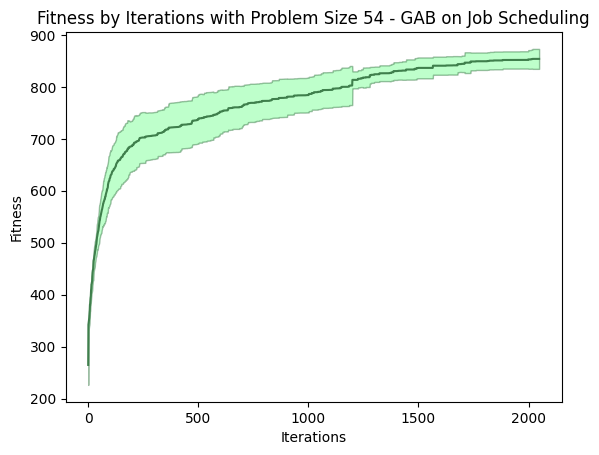

In [41]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [42]:
df_fitness_iter_ffp.avg_fitness.max()

853.8333333333334

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

55.749439459065414

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(178    178
 179    179
 Name: Iteration, dtype: int64,)

In [45]:
# Fevals - iteration

In [46]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [47]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,2.0,0.000000
2,2,3.3,0.233333
3,3,4.8,0.400000
4,4,6.2,0.844444


In [49]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [50]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 14.144099672851395)

In [51]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,2.0,0.000000,0.000000
2,2,3.3,0.233333,0.483046
3,3,4.8,0.400000,0.632456
4,4,6.2,0.844444,0.918937


Text(0, 0.5, 'FEvals')

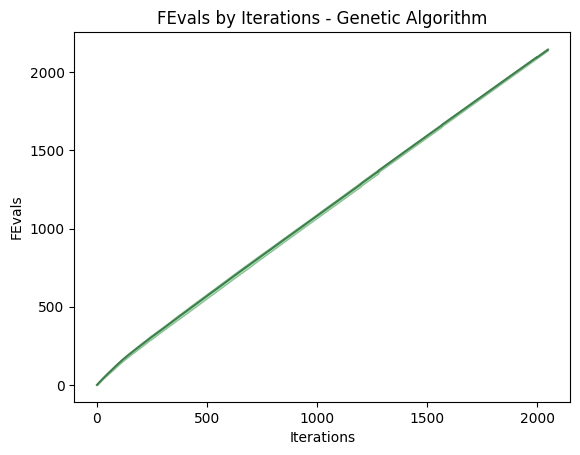

In [52]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [53]:
# fitness - wall clock time

In [54]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [55]:
df_time_iter_ffp.shape

(2049, 3)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001812,3.279828e-07
1,1,0.017122,1.012811e-04
2,2,0.030699,1.778889e-04
3,3,0.043776,3.389652e-04
4,4,0.053812,3.782443e-04


In [57]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [58]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001812,3.279828e-07,0.000573
1,1,0.017122,1.012811e-04,0.010064
2,2,0.030699,1.778889e-04,0.013338
3,3,0.043776,3.389652e-04,0.018411
4,4,0.053812,3.782443e-04,0.019449


Text(0, 0.5, 'Time')

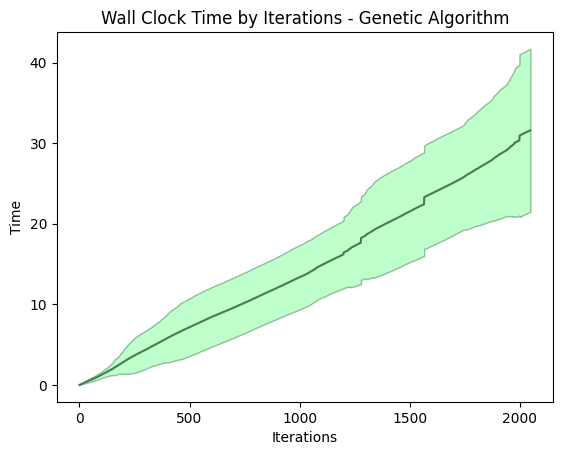

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp.stddev_time.max()

10.104925832998381

In [61]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2046    2046
Name: Iteration, dtype: int64

In [62]:
df_time_iter_ffp.avg_time.max()

31.593750466340378

In [63]:
# maybe look at how std dev decrease in bulks

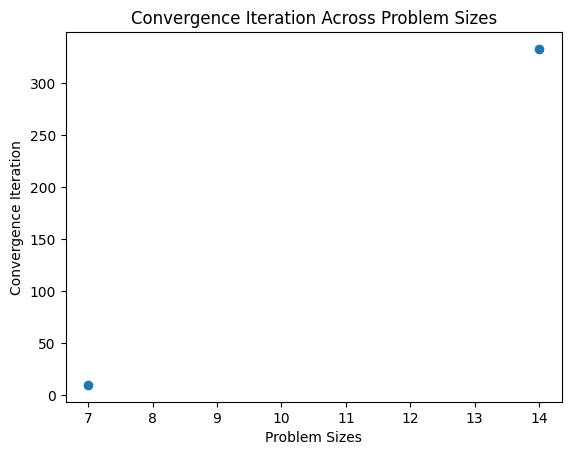

In [64]:
# scatter plot of convergent points across problem sizes
plt.scatter([7, 14], [10, 333])
plt.title('Convergence Iteration Across Problem Sizes')
plt.xlabel('Problem Sizes')
plt.ylabel('Convergence Iteration')
plt.show()